# Import Libraries and Clean the Data

In [ ]:
# CSE 163 AJ:
# Jiachen (Chris) Lu
# Guanhua (Martin) Chen
# Yiqiao (Jeremy) Peng

In [ ]:
# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
#from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
sns.set()

In [ ]:
## Comments
# Group name:
# Explain code
# Test code
# 20% training / 80% test (see trend line)
# Separate two data set into training and test (validation test): Machine Learning part

# Falke8
# README
# Comments
# TestCase

In [ ]:
# Data Cleaning
url = 'https://raw.githubusercontent.com/jlu1211/CSE163-Final-Project/main/Basketball_Shoes%20-%20Sheet1.csv?token=GHSAT0AAAAAACDICY72ZIJZXE5BECE6OLISZDVCBQA'
data = pd.read_csv(url)
data = data.drop(0)
data = data.reset_index(drop=True)
# Drop any unnecessary columns
data_general = data.drop(['Heel-to-toe Offset', 'Recent Release',
                          'Asia Brand?', 'Budget Shoe? ($100)',
                          'Sizing Recommendation', 'Sizing Notes'], axis=1)
# Convert MSRP to comparable state
data_general['MSRP'] = data_general['MSRP'].str.replace('$', '').astype(int)
# Create new column for number of brand count reference
counts = data_general['Brand'].value_counts()
data_brand_avg = data_general.drop(['Year of Release',
                                    'Weight per shoe (US9)'],
                                   axis=1).groupby('Brand').mean()
data_brand_avg['Counts'] = counts
data_brand_avg.reset_index(inplace=True)
data_general

<ipython-input-72-03651a06674d>:11: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-72-03651a06674d>:16: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Brand,Shoe Name,Traction,Cushioning,Lockdown,Lateral Stability,Torsion Support,Weight,Durability,Ventilation,Avg,Overall Rating,Guard,Wing,Big,Outdoor,Reviews,Year of Release,MSRP,Weight per shoe (US9)
0,361°,[Ranzhan],87.0,77.0,69.0,76.0,78.0,84.0,85.0,87.0,78.0,75.0,73.0,77.0,74.0,84.0,20.0,2021-,80,350 - 370g
1,361°,AG1,86.0,83.0,83.0,87.0,90.0,68.0,74.0,66.0,84.0,84.0,80.0,86.0,86.0,77.0,33.0,2020-21,120,440 - 460g
2,361°,AG1 SE,88.0,81.0,76.0,85.0,85.0,74.0,75.0,85.0,82.0,81.0,78.0,82.0,84.0,79.0,15.0,2021-,90,420 - 430g
3,361°,AG2,85.0,83.0,79.0,74.0,85.0,64.0,71.0,70.0,82.0,77.0,72.0,81.0,82.0,77.0,24.0,2021-,120,450 - 470g
4,361°,AG3 Pro,86.0,83.0,77.0,87.0,92.0,69.0,73.0,64.0,82.0,81.0,77.0,84.0,85.0,73.0,16.0,2022-,130,450 - 470g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,XTEP,JLIN 2,75.0,85.0,70.0,87.0,89.0,76.0,80.0,82.0,76.0,74.0,68.0,77.0,84.0,83.0,25.0,2021-,125,400 - 420g
447,XTEP,JLIN 2 SE,84.0,88.0,85.0,89.0,92.0,80.0,67.0,78.0,86.0,88.0,86.0,89.0,90.0,71.0,31.0,2022-,120,390 - 410g
448,XTEP,JLIN F.L.A.S.H. 2.0,84.0,79.0,63.0,63.0,63.0,91.0,88.0,94.0,75.0,65.0,63.0,68.0,63.0,84.0,5.0,2021-,80,340 - 360g
449,XTEP,JLIN F.L.A.S.H. 3.0,82.0,80.0,86.0,85.0,78.0,84.0,75.0,85.0,83.0,84.0,84.0,85.0,83.0,81.0,17.0,2022-,90,360 - 380g


# Research Question 1


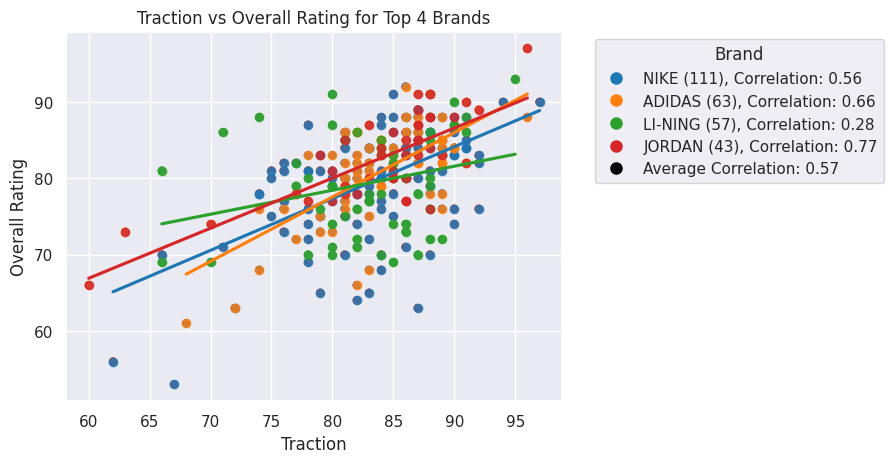

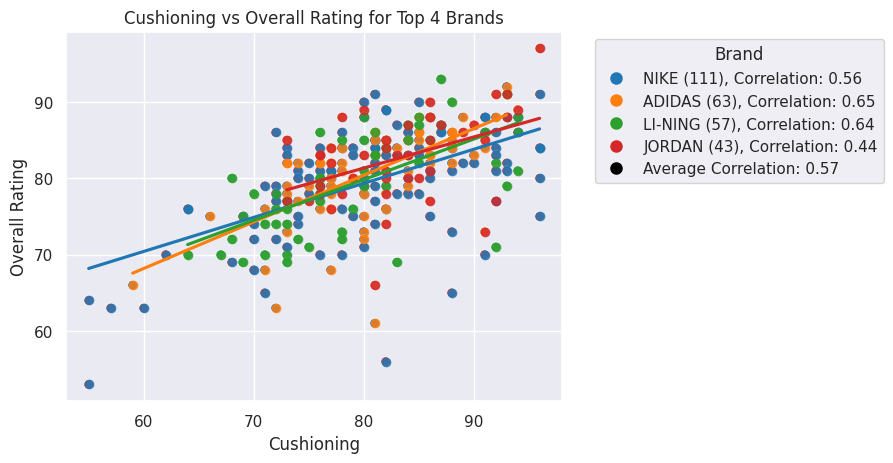

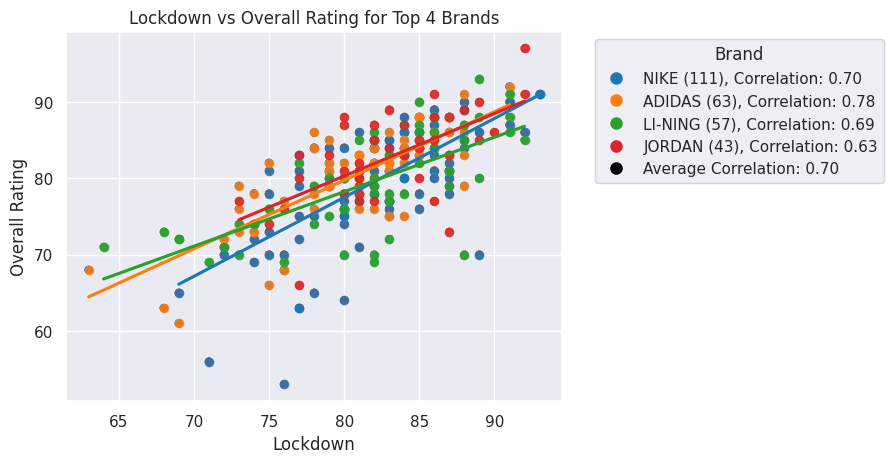

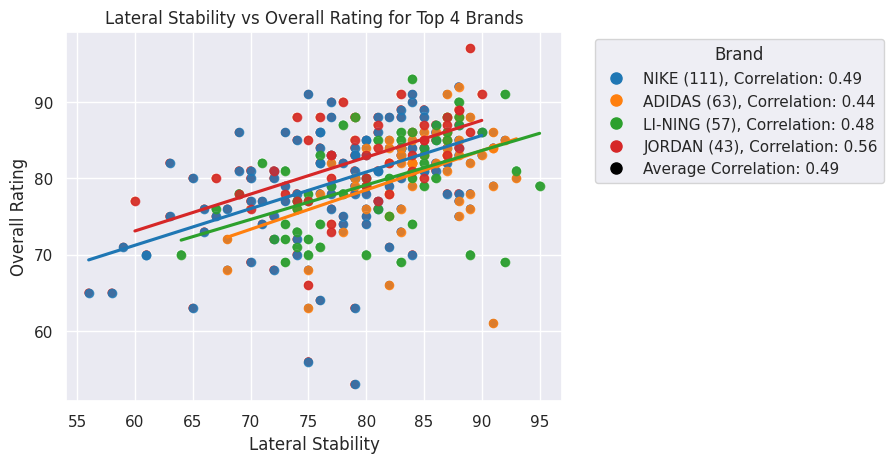

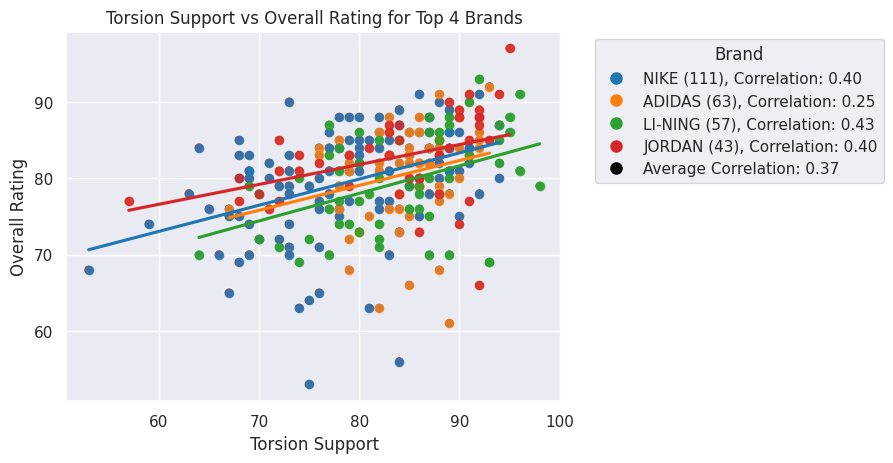

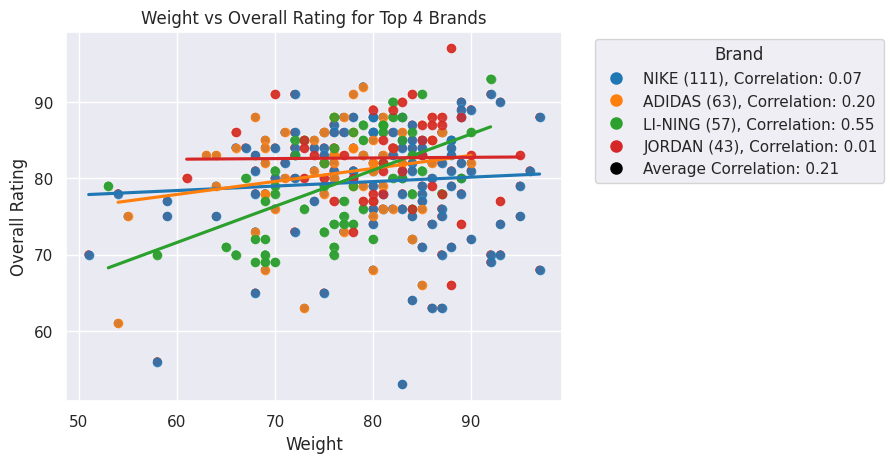

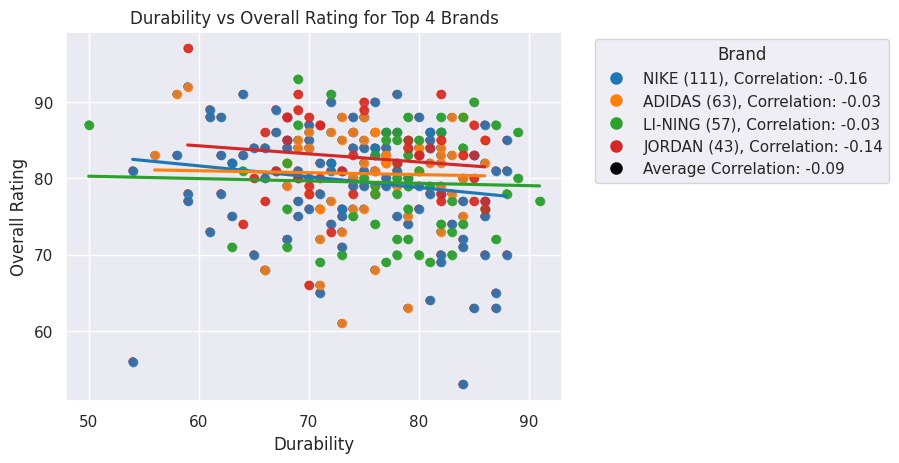

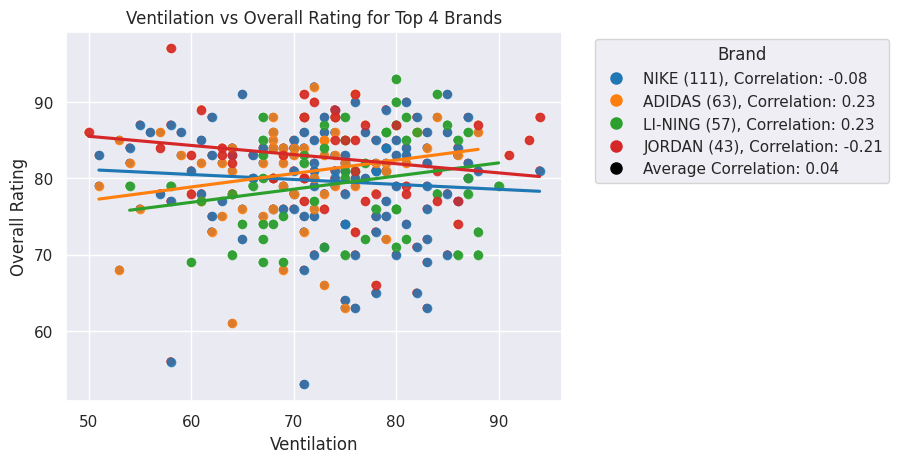

In [ ]:
# Research Question 1
def plot_scat_reg(data, x_col, y_col, is_test=False):
    """
    Plots scatter plots with regression lines and correlations for the top four brands
    Takes in dataframe contains values for attributes for each brand average
    Takes in two strings that indicate compare columns
    """
    # Extract data for the top four brands
    data = data[['Brand', x_col, y_col]]
    top_brands = data['Brand'].value_counts().nlargest(4).index.tolist()
    data_top_brands = data[data['Brand'].isin(top_brands)]
    shoe_num = data_top_brands['Brand'].value_counts()

    # Define colors for each brand
    palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Create the scatter plot with colored points
    sns.scatterplot(x=x_col, y=y_col, hue='Brand', data=data_top_brands, s=50)

    # Regression Line and Correlation
    correlations = []
    for brand, color in zip(top_brands, palette):
        single_brand_data = data_top_brands[data_top_brands['Brand'] == brand]
        brand_trac_corr = single_brand_data[x_col].corr(single_brand_data[y_col])
        correlations.append(brand_trac_corr)
        sns.regplot(x=x_col, y=y_col, data=single_brand_data, ci=None, color=color)

    # Calculate average correlation
    avg_corr = np.mean(correlations)
    # Create legend labels and handles
    legend_labels = [f'{brand} ({count}), Correlation: {corr:.2f}' for brand, count, corr in zip(shoe_num.index, shoe_num.values, correlations)]
    legend_labels.append(f'Average Correlation: {avg_corr:.2f}')
    legend_handles = [plt.Line2D([], [], color=color, marker='o', linestyle='', markersize=8) for color in palette]
    legend_handles.append(plt.Line2D([], [], color='black', marker='o', linestyle='', markersize=8))
    # Set plot title and axis labels
    if is_test:
      plt.title('Test: ' + f'{x_col} vs {y_col} for Top {4} Brands')
    else:
      plt.title(f'{x_col} vs {y_col} for Top {4} Brands')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='best', labels=legend_labels, handles=legend_handles)
    plt.show()

def plot_attributes_vs_overall(data, is_test):
    """
    Plots scatter plots with regression lines and correlations for multiple attributes against overall score
    Takes in dataframe that contain all the data
    """
    # Get the column names of the attributes
    attributes = data.columns[2:10]
    for attribute in attributes:
      plot_scat_reg(data, attribute, 'Overall Rating', is_test)

plot_attributes_vs_overall(data_general, is_test=False)

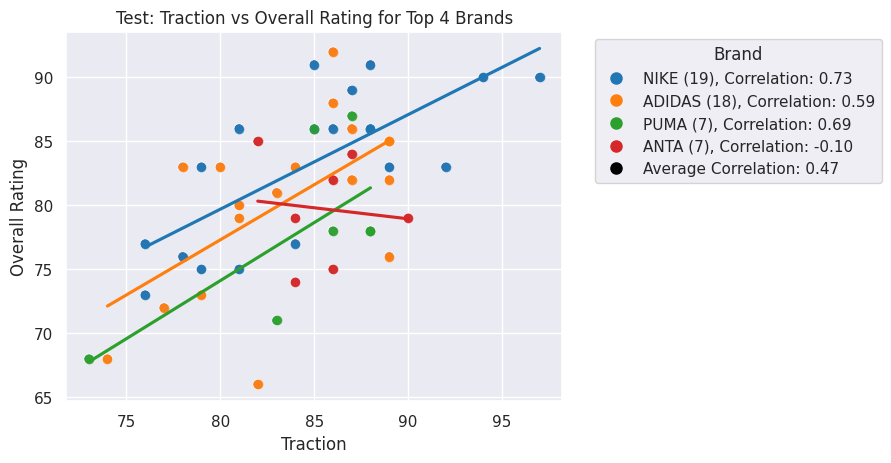

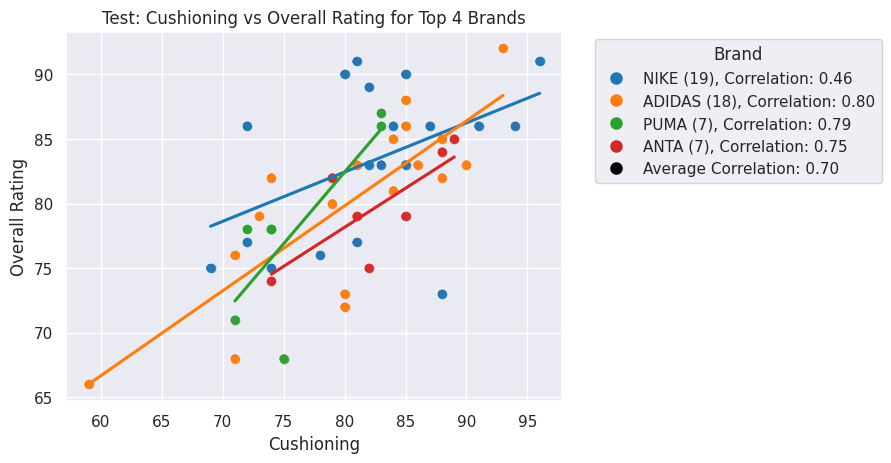

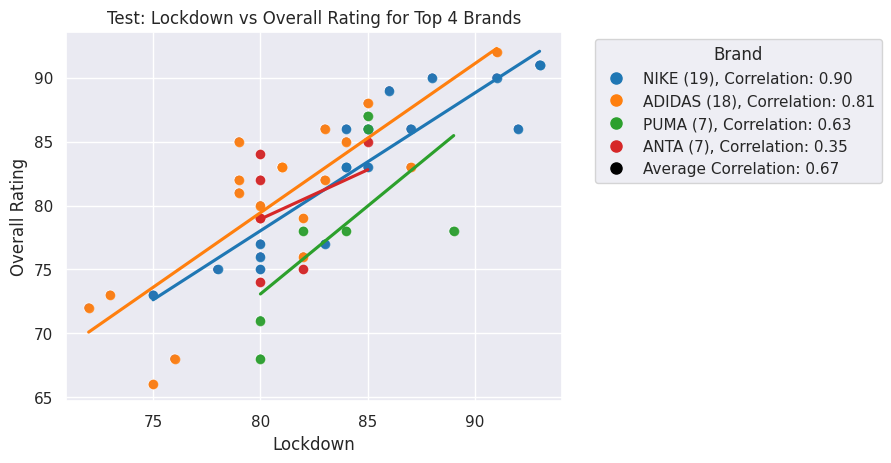

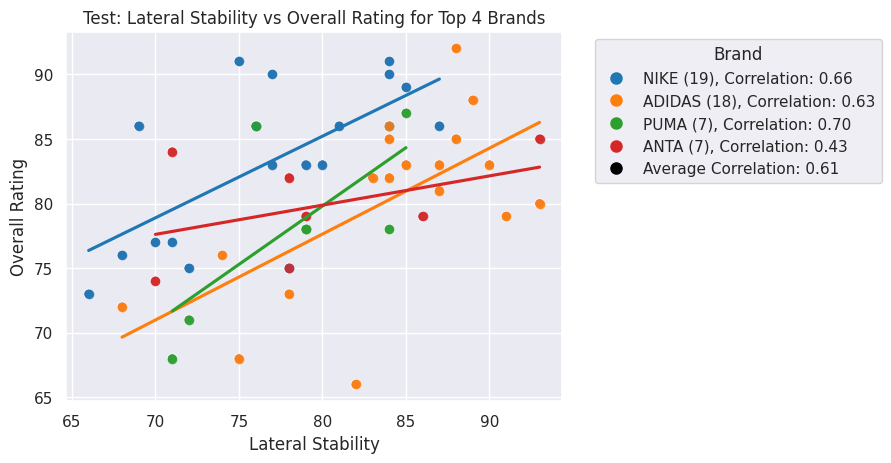

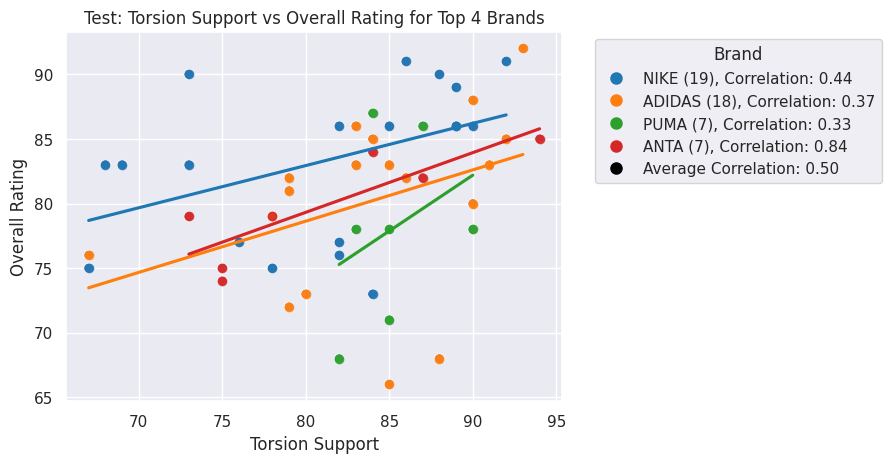

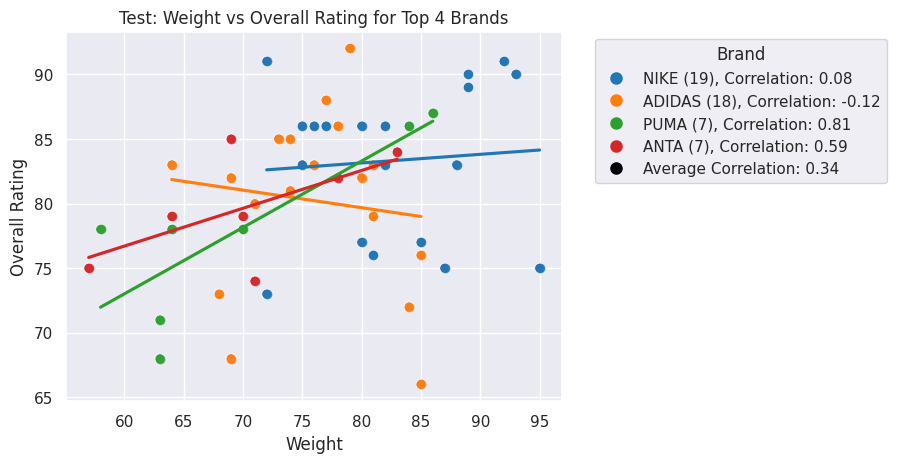

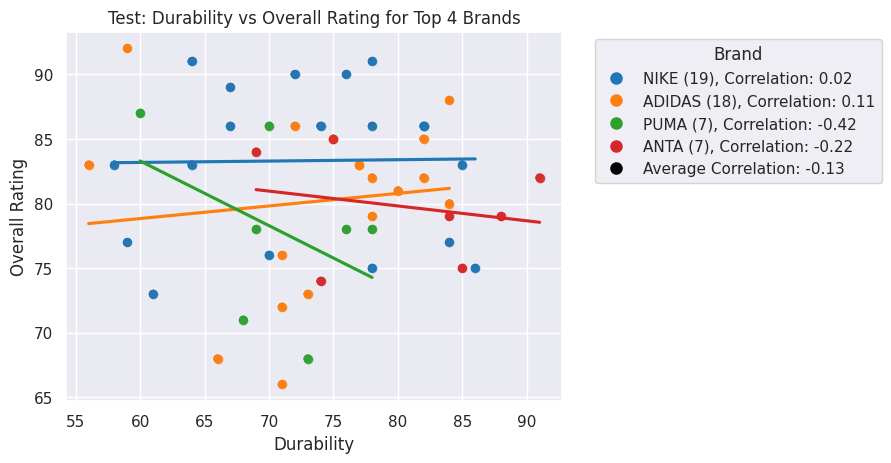

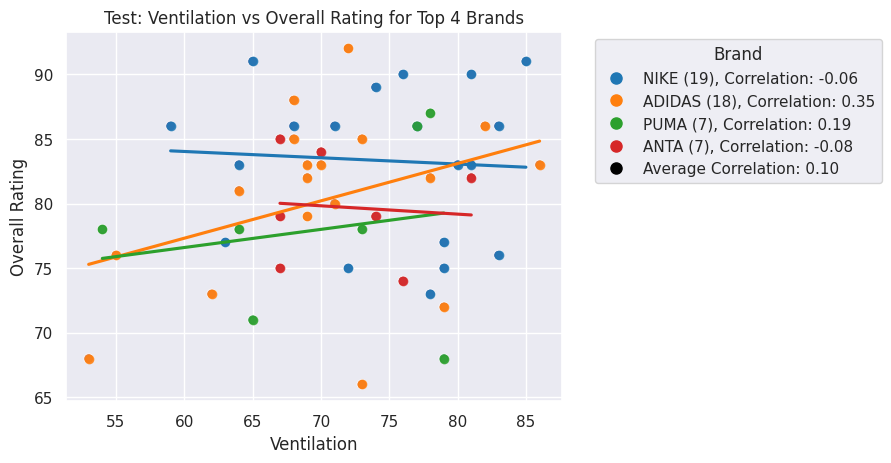

In [ ]:
# Testing
# Take 20% of the data as sample
data_sample = data_general.sample(frac=0.2, random_state=42)
plot_attributes_vs_overall(data_sample, is_test=True)

In [ ]:
# Plot all brands radar by their attributes
attributes = data_brand_avg.columns[1:9]
brands = data_brand_avg.index.tolist()

def radar_plot_trac_vent(data, brands, is_test=False):
    """
    Plots radar charts for each brand based on their attributes.
    Takes in dataframe containing brand attribute data
    Takes in list of brand names
    """
    for brand_index in range(len(brands)):
        plot_radar(data, brand_index, is_test)

def plot_radar(data, brand_index, is_test):
    """
    Plots a radar chart for a specific brand based on its attribute data.
    Takes in dataframe contain specific attribute data
    Takes in specific brand index
    """
    if is_test:
      title = 'Test: ' + data.iloc[brand_index, 0]
    else:
      title = data.iloc[brand_index, 0]
    attribute_data = data.iloc[brand_index, 1:9].values.tolist()
    df = pd.DataFrame({
        'attribute': attributes,
        'value': attribute_data
    })

    fig = px.line_polar(df, r='value', theta='attribute', line_close=True,
                        template='presentation', title=title)
    fig.update_traces(fill='toself')

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[55, 95]
            )
        )
    )

    fig.show()

radar_plot_trac_vent(data_brand_avg, brands)

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
# Testing
# Take 20% of the original data
data_sample = data.sample(frac=0.2, random_state=42)

# Average values for each brand
data_sample_brand_avg = data_sample.groupby('Brand').mean()
data_sample_brand_avg['Counts'] = data_sample['Brand'].value_counts()
data_sample_brand_avg.reset_index(inplace=True)

# Plot the radar for test case
radar_plot_trac_vent(data_sample_brand_avg, data_sample_brand_avg.index.tolist(), is_test=True)

<ipython-input-76-a32c588b39a2>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
# Radar plot that compare four brands attributes by comparing back to back
def plot_two_brand_radar(data, brands, attributes):
    """
    Plots radar charts comparing attributes of two brands side by side.
    Takes dataframe containing brand attribute data
    Takes list that contains brand names
    Takes in list of attributes names.
    """
    for brand in brands:
      compare_top_four_brands(data, brand, attributes)

def compare_top_four_brands(data, brands, attributes):
    brand1 = brands[0]
    brand2 = brands[1]
    brand1_index = data[data['Brand'] == brand1].index[0]
    brand2_index = data[data['Brand'] == brand2].index[0]
    brand1_values = data.iloc[brand1_index, 1:9].values.tolist()
    brand2_values = data.iloc[brand2_index, 1:9].values.tolist()

    df_brand1 = pd.DataFrame({
        'attribute': attributes,
        'value': brand1_values,
        'brand': [brand1]*len(attributes)
    })

    df_brand2 = pd.DataFrame({
        'attribute': attributes,
        'value': brand2_values,
        'brand': [brand2]*len(attributes)
    })

    df = pd.concat([df_brand1, df_brand2])

    fig = px.line_polar(df, r='value', theta='attribute', color='brand', line_close=True,
                        template='presentation',
                        title=f"{brand1} vs {brand2}")

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[65, 85]
            )
        )
    )

    fig.show()

top_four_brands = [['NIKE', 'ADIDAS'], ['NIKE', 'LI-NING'], ['NIKE', 'JORDAN'],
               ['ADIDAS', 'LI-NING'], ['ADIDAS', 'JORDAN'], ['LI-NING', 'JORDAN']]
attributes = data_brand_avg.columns[0:8]
plot_two_brand_radar(data_brand_avg, top_four_brands, attributes)

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
# Testing
# List of specific brands to select
selected_brands = ['NIKE', 'ADIDAS', 'LI-NING', 'JORDAN']

# Filter original data for selected brands
selected_data = data[data['Brand'].isin(selected_brands)]

# Take 20% of the selected data
selected_data_sample = selected_data.sample(frac=0.2, random_state=42)

# Average values for each brand
selected_data_sample_avg = selected_data_sample.groupby('Brand').mean()
selected_data_sample_avg['Counts'] = selected_data_sample['Brand'].value_counts()
selected_data_sample_avg.reset_index(inplace=True)

# Plot the radar for test case
top_four_brands = [['NIKE', 'ADIDAS'], ['NIKE', 'LI-NING'], ['NIKE', 'JORDAN'],
               ['ADIDAS', 'LI-NING'], ['ADIDAS', 'JORDAN'], ['LI-NING', 'JORDAN']]
attributes = selected_data_sample_avg.columns[0:8]
plot_two_brand_radar(selected_data_sample_avg, top_four_brands, attributes)

<ipython-input-78-35f2cd3765b5>:12: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Research Question 2


<Axes: xlabel='Cushioning', ylabel='MSRP'>

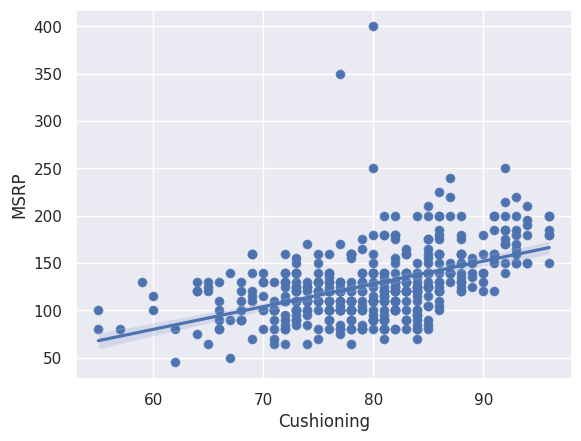

In [ ]:
# Scatter plot visualization using Plotly Express to display the relationship
#   between average overall rating and MSRP by brand.
fig = px.scatter(data_brand_avg, x='Overall Rating', y='MSRP', size='Counts', color='Brand',
                 hover_name='Brand', log_x=True, size_max=60)
fig.update_yaxes(tickformat='$,.0f')
fig.update_layout(
    title='Average Overall Rating vs. MSRP by Brand',
    plot_bgcolor='rgba(168,177,175,0.18)'
)
fig.show()

sns.scatterplot(x='Cushioning', y='MSRP', data=data_general)
sns.regplot(x='Cushioning', y='MSRP', data=data_general)

In [ ]:
# Testing
test_data = data_general.sample(frac=0.2, random_state=42)

# Calculate average values for the test data
test_data_avg = test_data.groupby('Brand').mean()
test_data_avg['Counts'] = test_data['Brand'].value_counts()
test_data_avg.reset_index(inplace=True)

# Scatter plot for the test data
fig = px.scatter(test_data_avg, x='Overall Rating', y='MSRP', size='Counts', color='Brand',
                 hover_name='Brand', log_x=True, size_max=60)
fig.update_yaxes(tickformat='$,.0f')
fig.update_layout(
    title='Test: Average Overall Rating vs. MSRP by Brand',
    plot_bgcolor='rgba(168,177,175,0.18)'
)
fig.show()

<ipython-input-80-07b0b68df9fa>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# Research Question 3



In [ ]:
# Research Question 3
"""
This section assigns positions to data points based on the maximum value
among 'Guard', 'Wing', and 'Big' columns in the 'data_general' DataFrame.
It creates a new column called 'Position' to store the assigned positions.
Additionally, it selects specific columns as features for training and assigns
the 'Position' column as labels.
"""
column_names = data_general[['Guard', 'Wing', 'Big']].idxmax(axis=1)
data_general['Position'] = column_names
features = data_general[['Lockdown', 'Cushioning', 'Traction',
                         'Ventilation', 'Durability',
                         'Weight', 'Torsion Support',
                         'Lateral Stability']]
labels = data_general['Position']

In [ ]:
"""
Train and test the Decision Tree classifier model
"""
# Create a Decision Tree classifier model with a maximum depth of 20
model = DecisionTreeClassifier(max_depth=20)
# Split the features and labels into training and test sets, with 80%
#   of the data used for training and 20% for testing.
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.2)
# Train the Decision Tree classifier model using the training data.
model.fit(features_train, labels_train)
# Compute train accuracy.
train_predictions = model.predict(features_train)
print('Train Accuracy:', accuracy_score(labels_train, train_predictions))
# Compute test accuracy.
test_predictions = model.predict(features_test)
print('Test  Accuracy:', accuracy_score(labels_test, test_predictions))

Train Accuracy: 1.0
Test  Accuracy: 0.7472527472527473


In [ ]:
# Testing
"""
Validation Test
This code evaluates the trained Decision Tree classifier model
using cross-validation.
It performs 10-fold cross-validation and computes the accuracy for each fold.
The mean accuracy across all folds is also calculated and printed.
"""
# Perform cross-validation with 5 folds
scores = cross_val_score(model, features, labels, cv=5)

# Print the accuracy for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1} Accuracy: {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Fold 1 Accuracy: 0.7252747252747253
Fold 2 Accuracy: 0.7
Fold 3 Accuracy: 0.7111111111111111
Fold 4 Accuracy: 0.7555555555555555
Fold 5 Accuracy: 0.7888888888888889
Mean Accuracy: 0.7361660561660561


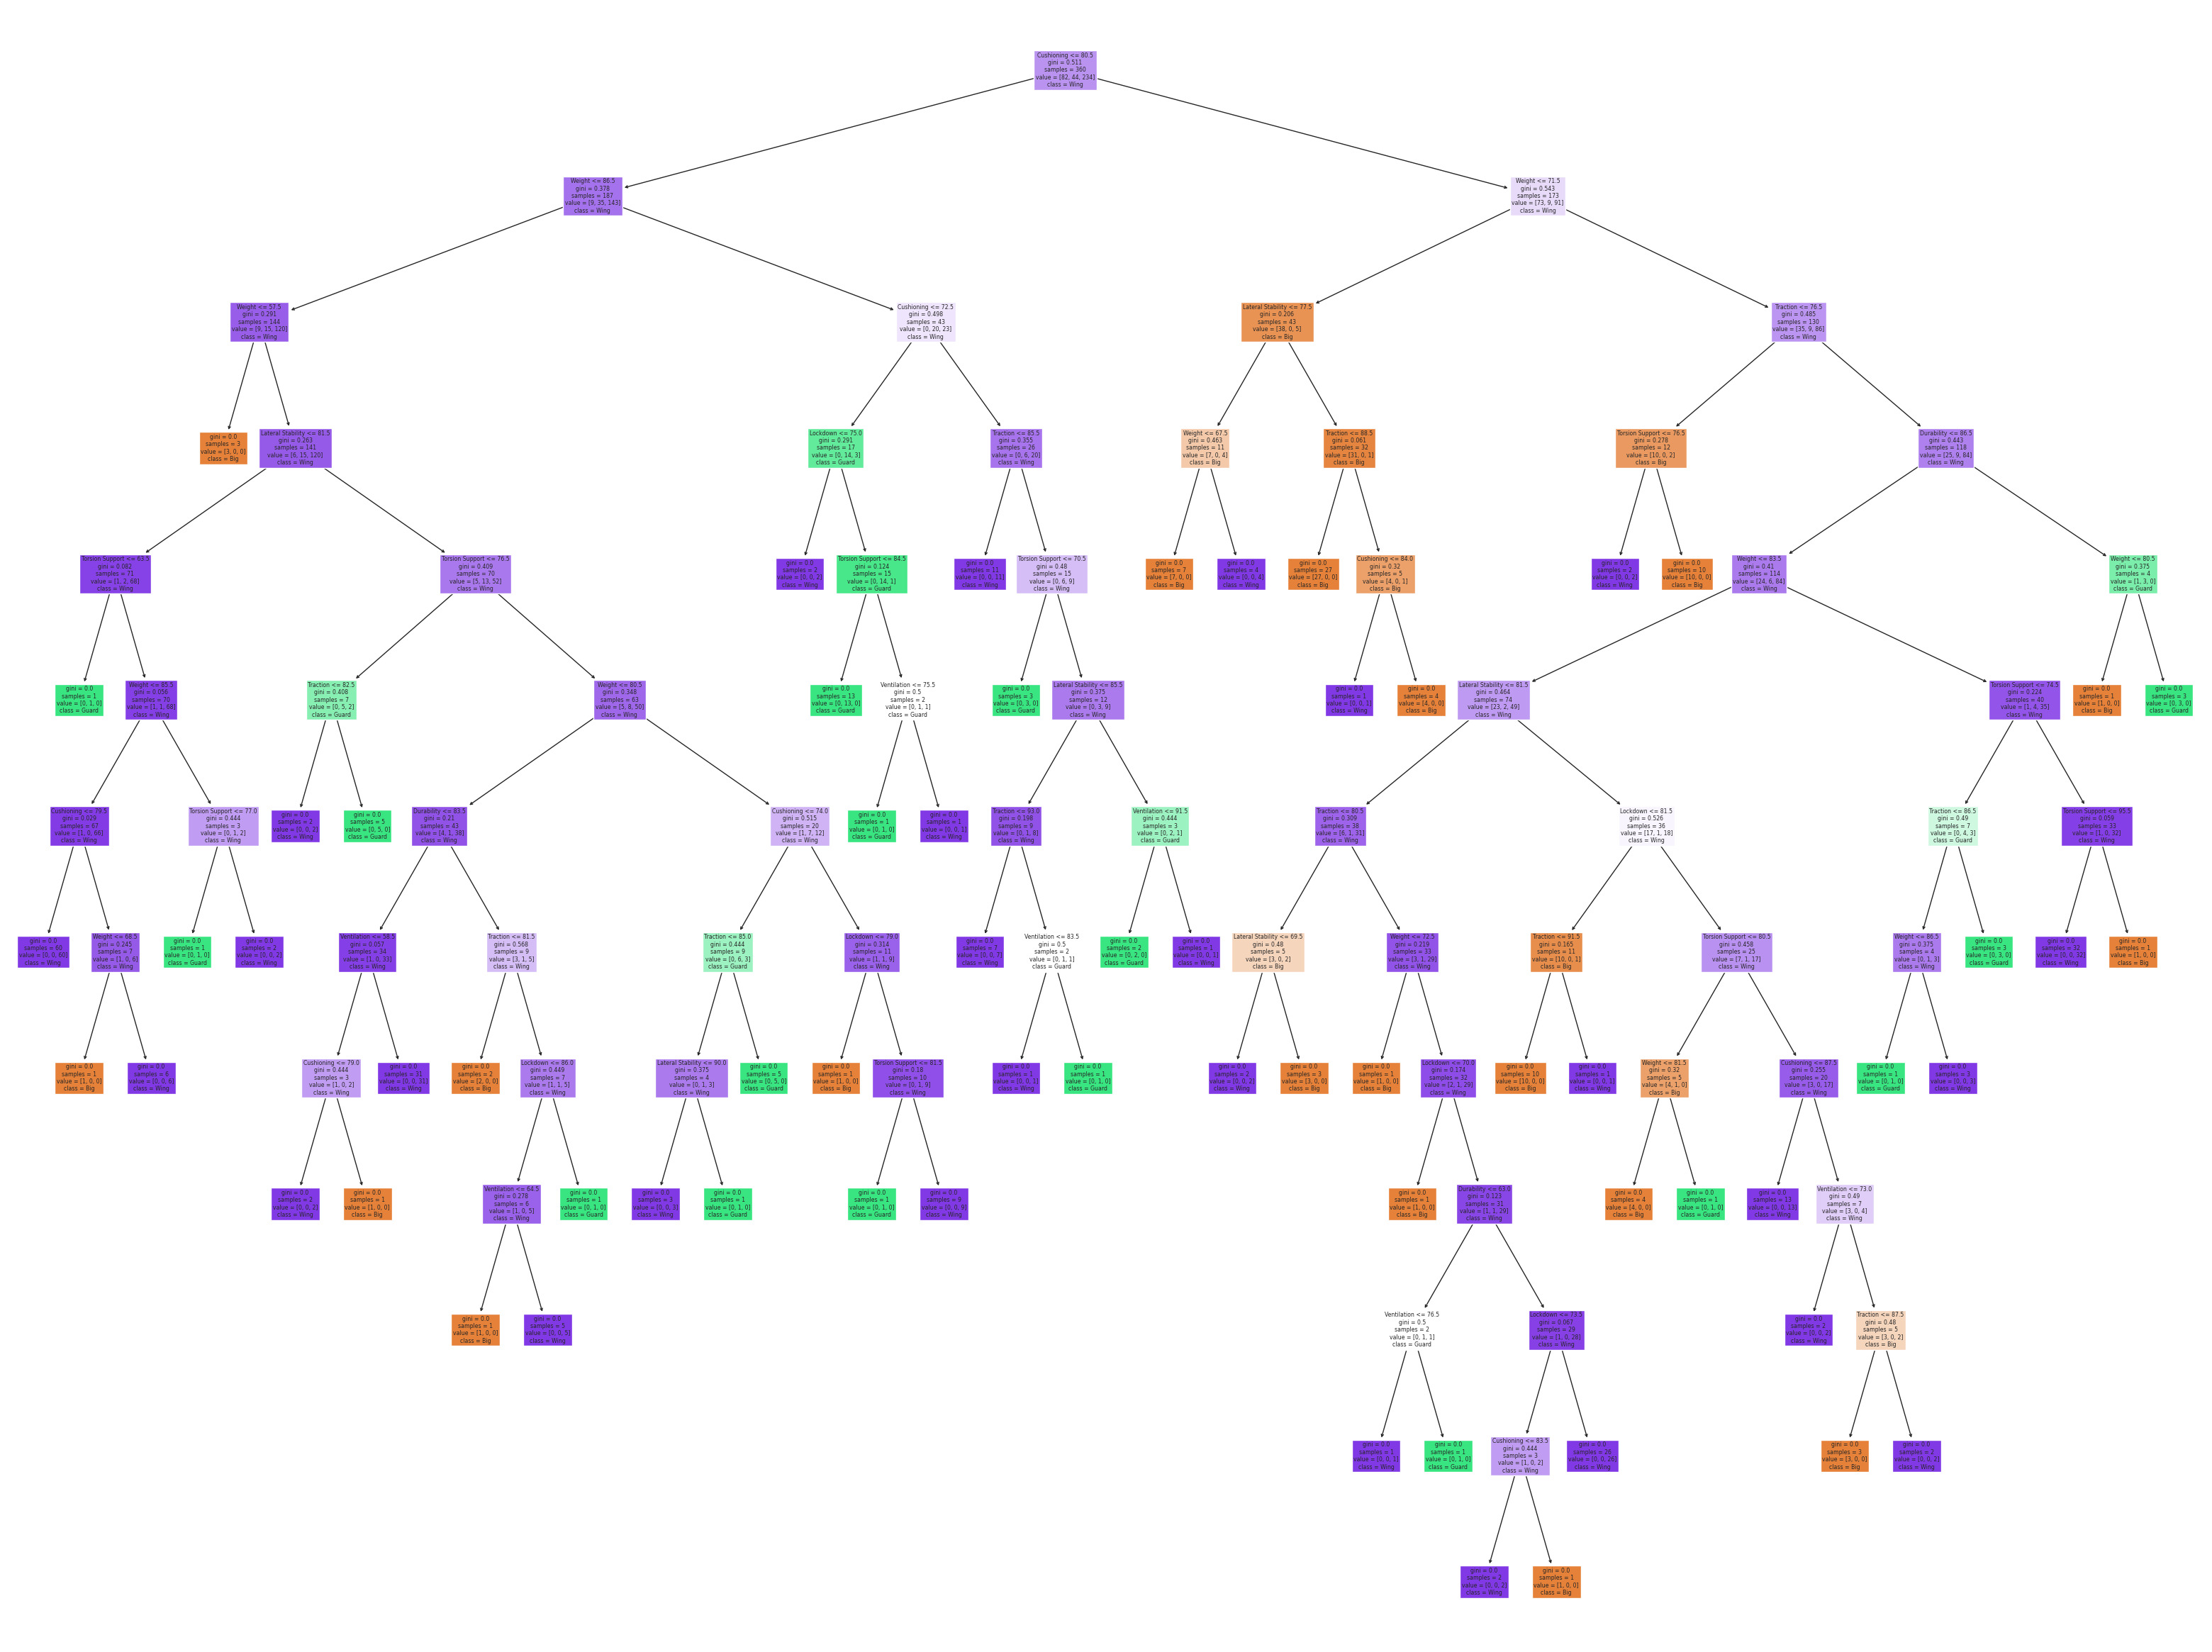

In [ ]:
"""
Decision Tree Visualization
This code creates and fits a Decision Tree classifier model using
the Gini impurity criterion and maximum depth of 20.
It then plots the decision tree visualization of the fitted model,
allowing for a graphical representation of the model's decision-making process.
"""
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=20,
                                  random_state=0)
# Fit the model
clf_gini.fit(features_train, labels_train)

# Plot the tree
plt.figure(figsize=(40, 30))
plot_tree(clf_gini, feature_names=features_train.columns,
          class_names=clf_gini.classes_, filled=True)
plt.show()

In [ ]:
"""
User Input and Prediction
This code takes user input for each feature, creates a DataFrame from the
user input, and uses the trained model to predict the position based on
the user input.
Then show the predicted position.
"""
user_features = []
for feature in features.columns:
    user_input = input(f"Enter the value for {feature}: ")
    user_features.append(float(user_input))
# Create a DataFrame from user input
user_df = pd.DataFrame([user_features], columns=features.columns)
# Predict the position for user input
user_position = model.predict(user_df)
print("Predicted Position:", user_position[0])